<a href="https://colab.research.google.com/github/Subhraj07/Machine_Learning_Models/blob/master/MLpractice/CEREBRINOCS/classification_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# datasets [https://github.com/suraj-deshmukh/BBC-Dataset-News-Classification]
# https://raw.githubusercontent.com/suraj-deshmukh/BBC-Dataset-News-Classification/master/dataset/dataset.csv
# https://raw.githubusercontent.com/Subhraj07/Machine_Learning_Models/master/MLpractice/CEREBRINOCS/datasets/news_article.csv

In [0]:
# Generate Raw data
import os
import pandas as pd
from sklearn.model_selection import train_test_split

data_folder = "data/bbc-fulltext/bbc/"
folders = ["business","entertainment","politics","sport","tech"]

os.chdir(data_folder)

x = []
y = []
z = []

for i in folders:
    files = os.listdir(i)
    for text_file in files:
        file_path = i + "/" +text_file
        print("reading file:", file_path)
        with open(file_path) as f:
            data = f.readlines()
        data = ' '.join(data)
        x.append(data)
        y.append(i)
        z.append(text_file)
        
data = {'news': x, 'type': y, 'filename':z}       
df = pd.DataFrame(data)
print('writing csv flie ...')
df.to_csv("C:/Users/212747507/Desktop/jupyter_notebooks/news_article.csv", index=False)

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Subhraj07/Machine_Learning_Models/master/MLpractice/CEREBRINOCS/datasets/news_article.csv", encoding='cp1252')

In [0]:
new = df["news"].str.split("\n", n = 1, expand = True)
df["title"] = new[0]
df["content"] = new[1]
df.drop(["news"], axis=1, inplace=True)
df.rename(columns={'type': 'category'}, inplace=True)
df['content'].replace(r'\n',' ', regex=True, inplace=True) 

In [0]:
df['category_id'] = df['category'].factorize()[0]
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [38]:
df.sample(5, random_state=0)

,category,filename,title,content,category_id
384,business,385.txt,Tate & Lyle boss bags top award,Tate & Lyle's chief executive has been name...,0
1983,tech,160.txt,Halo 2 sells five million copies,Microsoft is celebrating bumper sales of it...,4
985,politics,090.txt,MSPs hear renewed climate warning,Climate change could be completely out of c...,2
1386,sport,074.txt,Pavey focuses on indoor success,Jo Pavey will miss January's View From Grea...,3
1294,politics,399.txt,Tories reject rethink on axed MP,Sacked MP Howard Flight's local Conservativ...,2


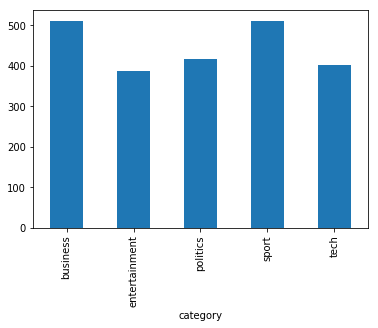

In [39]:
df.groupby('category').filename.count().plot.bar(ylim=0)